In [6]:
import pandas as pd
import torch
import tensorqtl
import numpy as np
import seaborn as sns
from tensorqtl import genotypeio, cis, trans
print(f'PyTorch {torch.__version__}')
print(f'Pandas {pd.__version__}')

# define paths to data
plink_prefix_path = '../../data/static/highpass_cellid_all/pseudobulk-scran/Shared/genotypes_filtered_plink'
expression_bed = '../../data/static/highpass_cellid_all/pseudobulk-scran/Shared/expression.bed.gz'
covariates_file = '../../data/static/highpass_cellid_all/pseudobulk-scran/Shared/covariates.tsv'
prefix = '../../data/static/highpass_cellid_all/pseudobulk-scran/Shared/tensorqtl_'

PyTorch 1.11.0+cu102
Pandas 1.4.2


In [2]:
# load phenotypes and covariates
phenotype_df, phenotype_pos_df = tensorqtl.read_phenotype_bed(expression_bed)
covariates_df = pd.read_csv(covariates_file, sep='\t', index_col=0).T

In [3]:
# PLINK reader for genotypes
pr = genotypeio.PlinkReader(plink_prefix_path)
genotype_df = pr.load_genotypes()
variant_df = pr.bim.set_index('snp')[['chrom', 'pos']]

Mapping files: 100%|██████████| 3/3 [00:04<00:00,  1.65s/it]


In [35]:
cis.map_nominal(genotype_df, variant_df, 
                phenotype_df, phenotype_pos_df, 
                prefix, covariates_df)

cis-QTL mapping: nominal associations for all variant-phenotype pairs
  * 51 samples
  * 18007 phenotypes
  * 5 covariates
  * 5273876 variants
  * checking phenotypes: 18007/18007
    ** dropping 686 phenotypes without variants in cis-window
  * Computing associations
    Mapping chromosome chr1
    processing phenotype 1923/17321    time elapsed: 0.16 min
    * writing output
    Mapping chromosome chr2
    processing phenotype 3054/17321    time elapsed: 0.36 min
    * writing output
    Mapping chromosome chr3
    processing phenotype 4061/17321    time elapsed: 0.50 min
    * writing output
    Mapping chromosome chr4
    processing phenotype 4776/17321    time elapsed: 0.62 min
    * writing output
    Mapping chromosome chr5
    processing phenotype 5595/17321    time elapsed: 0.74 min
    * writing output
    Mapping chromosome chr6
    processing phenotype 6478/17321    time elapsed: 0.86 min
    * writing output
    Mapping chromosome chr7
    processing phenotype 7362/17321 

In [4]:
cis_df = cis.map_cis(genotype_df, variant_df, 
                     phenotype_df, phenotype_pos_df,
                     covariates_df=covariates_df, seed=123456)

cis-QTL mapping: empirical p-values for phenotypes
  * 51 samples
  * 18007 phenotypes
  * 5 covariates


/project2/gilad/jpopp/ebQTL/.snakemake/conda/32332238fb63a33da22386aae45abc4e/lib/python3.10/site-packages/tensorqtl/core.py:52: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1980.)
  self.Q_t, _ = torch.qr(C_t - C_t.mean(0))


  * 3272257 variants
  * using seed 123456
  * checking phenotypes: 18007/18007
    ** dropping 713 phenotypes without variants in cis-window
  * computing permutations
    processing phenotype 17294/17294
  Time elapsed: 28.53 min
done.


In [5]:
cis_df

,num_var,beta_shape1,beta_shape2,true_df,pval_true_df,variant_id,tss_distance,ma_samples,ma_count,af,pval_nominal,slope,slope_se,pval_perm,pval_beta
phenotype_id,,,,,,,,,,,,,,,
OR4F5,182,1.008709,32.935097,38.490753,0.048026,rs2879816,860831,15,17,0.166667,0.034378,-0.431962,0.197833,0.799220,0.799777
SAMD11,857,1.057589,97.254036,36.898464,0.013536,rs3094315,-106742,29,38,0.372549,0.006946,-0.518175,0.182950,0.718428,0.713642
NOC2L,912,1.040972,95.419586,36.830437,0.059639,rs79774771,276040,14,15,0.147059,0.039314,-0.337611,0.158939,0.995900,0.996873
KLHL17,912,1.029264,105.529137,37.723610,0.005348,rs112150631,104034,11,12,0.117647,0.002605,-0.607913,0.190421,0.424558,0.417978
PLEKHN1,912,1.046102,95.297867,36.759785,0.051459,rs114625464,989866,12,12,0.117647,0.032909,0.654742,0.297263,0.991401,0.992763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAPK8IP2,1478,1.040446,166.682495,37.481663,0.000288,rs732710,-406717,19,23,0.225490,0.000084,-0.510239,0.117762,0.037896,0.040708
ARSA,1428,1.070310,164.372437,37.088467,0.014502,rs9628182,-42087,38,50,0.490196,0.007689,-0.426211,0.152566,0.897310,0.897845
SHANK3,1339,1.039233,156.019852,37.695400,0.005519,rs11913579,-986033,21,24,0.235294,0.002691,-0.489255,0.153811,0.563644,0.560422


<AxesSubplot:xlabel='pval_beta', ylabel='Count'>

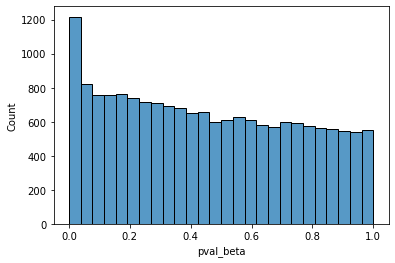

In [7]:
sns.histplot(cis_df, x="pval_beta")

In [14]:
cis_df['pval_bonf'] = [min(cis_df['pval_nominal'][i] * cis_df['num_var'][i], 1) for i in range(len(cis_df))]

<AxesSubplot:xlabel='pval_bonf', ylabel='Count'>

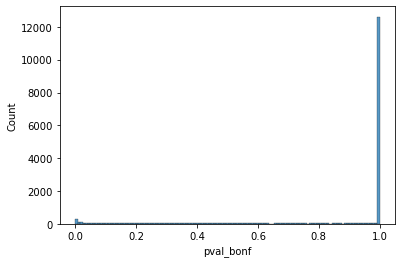

In [15]:
sns.histplot(cis_df, x="pval_bonf")

In [16]:
cis_df.to_csv("../../data/static/highpass_cellid_all/pseudobulk-scran/Shared/tensorqtl_permutations.tsv", sep="\t")